In [1]:
##########################################################################
# Created on Sat Nov 06 23:49:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 8.2.1.Dividend Discount Model

$$V=\frac{D_1}{1+r}+\frac{D_2}{(1+r)^2}+\frac{D_3}{(1+r)^3}+\cdots=\sum_{t=1}^\infty \frac{D_t}{(1+r)^t} \tag{8-1}$$\
where,\
V:intrinsic value\
$D_t$:dividend paid at time t\
r:required rate of return(annual compound)

Suppose $g_t$ is growth rate of dividend from t-1 to t,\
$$D_{t-1}(1+g_t)=D_t\tag{8-2}$$ or \
$$g_t=\frac{D_t-D_{t-1}}{D_{t-1}}\tag{8-3}$$

# 8.2.2.Zero Growth Model

Suppose $D_0$ indicates amount of dividend per share paid by the enterprise in the latest period, \
and the dividend of each period of the future is also equal to $D_0$.\
$$D_0=D_1=D_2=D_3=\cdots=D_\infty\tag{8-4}$$\
Substitute formula(8-4) into formula(8-1), we have\
$$V=\sum_{t=1}^\infty \frac{D_t}{(1+r)^t}=D_0\sum_{t=1}^\infty \frac{1}{(1+r)^t}=\frac{D_0}{r}\tag{8-5}$$

In [4]:
def value_ZGM(D,r):
    '''Define a function to calculate intrinisic value of a stock using Zero Growth Model
    D:amount of dividend per share paid by the enterprise in the latest period
    r:discount interest rate matched with enterprise risk(annual compound)'''
    value=D/r
    return value

In [5]:
Div=1.2
rate=0.1118

value=value_ZGM(D=Div,r=rate)
print('Intrinisic value of CMB using Zero Growth Model is ',round(value,4))

Intrinisic value of CMB using Zero Growth Model is  10.7335


# 8.2.3.Constant Growth Model

Suppose the dividend per share will maintain a fixed and positive growth rate in the future, thus $g_t=g>0$\
$$D_1=D_0(1+g)\tag{8-6}$$\
$$D_2=D_1(1+g)=D_0(1+g)^2\tag{8-7}$$\
$$\cdots$$\
$$D_t=D_{t-1}(1+g)=D_0(1+g)^t\tag{8-8}$$\
Substitute above formula into formula(8-1), we have\
$$V=\sum_{t=1}^\infty \frac{D_0(1+g)^t}{(1+r)^t}=D_0\sum_{t=1}^\infty \frac{(1+g)^t}{(1+r)^t}=D_0\frac{1+g}{r-g}\tag{8-9}$$

In [6]:
def value_CGM(D,g,r):
    '''Define a function to calculate intrinisic value of a stock using Constant Growth Model
    D:amount of dividend per share paid by the enterprise in the latest period
    g:growth rate of dividend and g<r
    r:discount interest rate matched with enterprise risk(annual compound)'''
    if r>g:
        value=D*(1+g)/(r-g)
    else:
        value='Na'
    return value

In [7]:
growth=0.1
value_new=value_CGM(D=Div,g=growth,r=rate)
print('Intrinisic value of CMB using Constant Growth Model is ',round(value_new,4))

Intrinisic value of CMB using Constant Growth Model is  111.8644


# 8.2.4.Two Stage Growth Model

Assuming that the first stage of the enterprise is in the future [0,T], the dividend growth rate of this stage is expressed in $g_1$,\
the second stage of the enterprise is in the future [T,$\infty$], the dividend growth rate of this stage is expressed in $g_2$ and $g_1>g_2$

$$
  First\hspace{ 2pt } stage\left\{
    \begin{array}{l}
      D_1=D_0(1+g_1)\tag{8-10~8-12} \\
      D_2=D_1(1+g_1)=D_0(1+g_1)^2 \\
      \cdots \\
      D_T=D_{T-1}(1+g_1)=D_0(1+g_1)^T
    \end{array}
  \right.
$$

$$
  Second\hspace{ 2pt } stage\left\{
    \begin{array}{l}
      D_{T+1}=D_T(1+g_2)=D_0(1+g_1)^T(1+g_2)\tag{8-13~8-15} \\
      D_{T+2}=D_{T+1}(1+g_2)=D_0(1+g_1)^T(1+g_2)^2 \\
      \cdots \\
      D_{T+N}=D_{T+N-1}(1+g_2)=D_0(1+g_1)^T(1+g_2)^N \\
      \cdots
    \end{array}
  \right.
$$

Substitute (8-10~8-12) into formula(8-1), we have\
$$V_1=D_0\sum_{t=1}^T\frac{(1+g_1)^t}{(1+r)^t}\tag{8-16}$$

Substitute (8-13~8-15) into formula(8-1), we have\
$$V_2=\frac{D_0(1+g_1)^T}{(1+r)^T}\sum_{t=1}^\infty\frac{(1+g_2)^t}{(1+r)^t}=\frac{D_0(1+g_1)^T}{(1+r)^T}\left(\frac{1+g_2}{r-g_2}\right)\tag{8-17}$$

Combine (8-16) and (8-17),the expression of two stage growth model is \
$$V=V_1+V_2=D_0\left[\sum_{t=1}^T\frac{(1+g_1)^t}{(1+r)^t}+\frac{(1+g_1)^T}{(1+r)^T}\left(\frac{1+g_2}{r-g_2}\right)\right]\tag{8-18}$$

In [10]:
import numpy as np
def value_2SGM(D,g1,g2,T,r):
    '''Define a function to calculate intrinisic value of a stock using 2Stage Growth Model
    D:amount of dividend per share paid by the enterprise in the latest period
    g1:growth rate of dividend at the first stage
    g2:growth rate of dividend at the second stage,g2<r
    T:term of the first stage in year
    r:discount interest rate matched with enterprise risk(annual compound)'''
    if r>g2:
        T_list=np.arange(1,T+1)
        V1=D*np.sum(pow(1+g1,T_list)/pow(1+r,T_list))
        V2=D*pow(1+g1,T)*(1+g2)/(pow(1+r,T)*(r-g2))
        value=V1+V2
    else:
        value='Na'
    return value

In [11]:
g_stage1=0.11
g_stage2=0.08
T_stage1=10

value_2stages=value_2SGM(D=Div,g1=g_stage1,g2=g_stage2,T=T_stage1,r=rate)
print('Intrinisic value of CMB using 2Stage Growth Model is ',round(value_2stages,4))

Intrinisic value of CMB using 2Stage Growth Model is  51.9933


/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


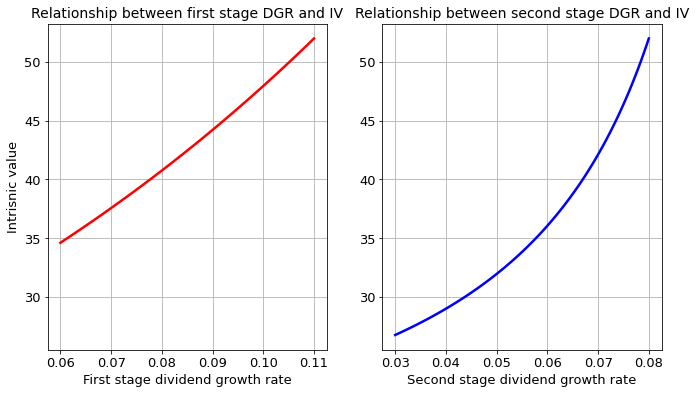

In [15]:
g1_list=np.linspace(0.06,0.11,100)
g2_list=np.linspace(0.03,0.08,100)

value_list1=np.zeros_like(g1_list)
for i in range(len(g1_list)):
    value_list1[i]=value_2SGM(D=Div,g1=g1_list[i],g2=g_stage2,T=T_stage1,r=rate)

value_list2=np.zeros_like(g2_list)
for i in range(len(g2_list)):
    value_list2[i]=value_2SGM(D=Div,g1=g_stage1,g2=g2_list[i],T=T_stage1,r=rate)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.plot(g1_list,value_list1,'r-',lw=2.5)
plt.xlabel('First stage dividend growth rate',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Intrisnic value',fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title('Relationship between first stage DGR and IV',fontsize=14)
plt.grid()

plt.subplot(1,2,2,sharey=plt.subplot(1,2,1))
plt.plot(g2_list,value_list2,'b-',lw=2.5)
plt.xlabel('Second stage dividend growth rate',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between second stage DGR and IV',fontsize=14)
plt.grid()
plt.show()

# 8.2.5.Three Stage Growth Model

Assuming that the first stage of the enterprise is in the future [0,$T_a$], the dividend growth rate of this stage is expressed in $g_a$,\
the second stage of the enterprise is in the future[$T_a,T_b$], the dividend growth rate of this stage is expressed in $g_t$, and t=$T_a+1,T_a+2,\cdots,T_b$\
the third stage of the enterprise is in the future [$T_b,\infty$], the dividend growth rate of this stage is expressed in $g_b$ \
and assuming in the second stage, $g_t$ decreases linearly from $g_a$ to $g_b$, expression is as below\
$$g_t=g_a-(g_a-g_b)\frac{t-T_a}{T_b-T_a}\tag{8-19}$$

$$
  First\hspace{ 2pt } stage\left\{
    \begin{array}{l}
      D_1=D_0(1+g_a)\tag{8-20~8-22} \\
      D_2=D_0(1+g_a)^2 \\
      \cdots \\
      D_{T_a}=D_0(1+g_a)^{T_a}
    \end{array}
  \right.
$$

$$
  Second\hspace{ 2pt } stage\left\{
    \begin{array}{l}
      D_{T_a+1}=D_{T_a}(1+g_{T_a+1})\tag{8-23~8-25} \\
      D_{T_a+2}=D_{T_a}(1+g_{T_a+1})(1+g_{T_a+2}) \\
      \cdots \\
      D_{T_b}=D_{T_a}(1+g_{T_a+1})(1+g_{T_a+2})\cdots(1+g_{T_b}) \\
    \end{array}
  \right.
$$

$$
  Third\hspace{ 2pt } stage\left\{
    \begin{array}{l}
      D_{T_b+1}=D_{T_b}(1+g_b)\tag{8-26~8-28} \\
      D_{T_b+2}=D_{T_b}(1+g_b)^2 \\
      \cdots \\
      D_{T_b+N}=D_{T_b}(1+g_b)^N \\
    \end{array}
  \right.
$$

Based on(8-20~8-22), we have\
$$V_1=D_0\sum_{t=1}^{T_a}\frac{(1+g_a)^t}{(1+r)^t}\tag{8-29}$$

Based on(8-23~8-25), we have\
$$V_2=\sum_{t=T_a+1}^{T_b}\frac{D_{t-1}(1+g_t)}{(1+r)^t}\tag{8-30}$$

Based on(8-26~8-28), we have\
$$V_3=\frac{D_{T_b}(1+g_b)}{(1+r)^{T_b}(r-g_b)}\tag{8-31}$$

Combine (8-29) to (8-31),the expression of three stage growth model is \
$$V=V_1+V_2+V_3=D_0\sum_{t=1}^{T_a}\frac{(1+g_a)^t}{(1+r)^t}+\sum_{t=T_a+1}^{T_b}\frac{D_{t-1}(1+g_t)}{(1+r)^t}+\frac{D_{T_b}(1+g_b)}{(1+r)^{T_b}(r-g_b)}\tag{8-32}$$

In [23]:
def value_3SGM(D,ga,gb,Ta,Tb,r):
    '''Define a function to calculate intrinisic value of a stock using 3Stage Growth Model
    D:amount of dividend per share paid by the enterprise in the latest period
    ga:growth rate of dividend at the first stage
    gb:growth rate of dividend at the third stage,gb<r
    Ta:term of the first stage in year
    Tb:term of the first and second stage in year
    r:discount interest rate matched with enterprise risk(annual compound)'''
    if r>gb:
        #First stage
        Ta_list=np.arange(1,Ta+1)
        D_stage1=D*pow(1+ga,Ta_list)
        V1=np.sum(D_stage1/pow(1+r,Ta_list))
        
        #Second stage
        Tb_list=np.arange(Ta+1,Tb+1)
        D_t=D_stage1[-1]
        D_stage2=[]
        for i in range(len(Tb_list)):
            gt=ga-(ga-gb)*(Tb_list[i]-Ta)/(Tb-Ta)
            D_t=D_t*(1+gt)
            D_stage2.append(D_t)
        D_stage2=np.array(D_stage2)
        V2=np.sum(D_stage2/pow(1+r,Tb_list))
        
        #Third stage
        D_Tb=D_stage2[-1]
        V3=D_Tb*(1+gb)/(pow(1+r,Tb)*(r-gb))
        
        value=V1+V2+V3
    else:
        value='Na'
    return value

In [24]:
g_stage1=0.11
g_stage3=0.075
T_stage1=6
T_stage2=4

value_3stages=value_3SGM(D=Div,ga=g_stage1,gb=g_stage3,Ta=T_stage1,Tb=T_stage1+T_stage2,r=rate)
print('Intrinisic value of CMB using 3Stage Growth Model is ',round(value_3stages,4))

Intrinisic value of CMB using 3Stage Growth Model is  43.557


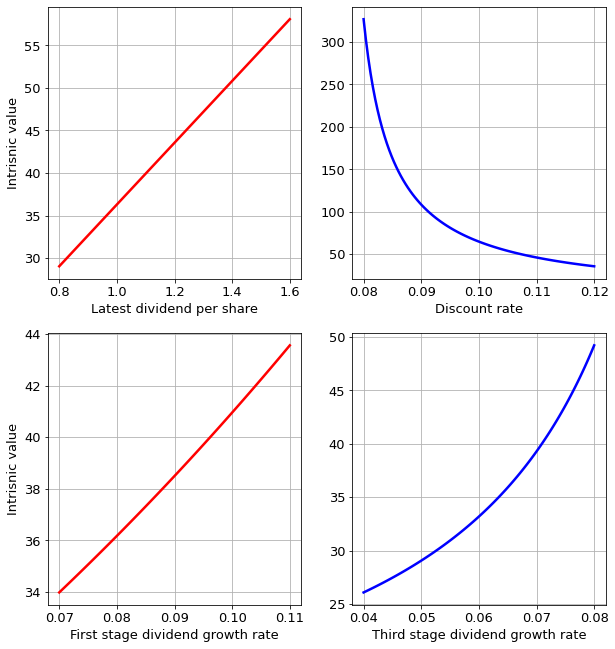

In [26]:
Div_list=np.linspace(0.8,1.6,100)
rate_list=np.linspace(0.08,0.12,100)
ga_list=np.linspace(0.07,0.11,100)
gb_list=np.linspace(0.04,0.08,100)

value_list1=np.zeros_like(Div_list)
for i in range(len(Div_list)):
    value_list1[i]=value_3SGM(D=Div_list[i],ga=g_stage1,gb=g_stage3,Ta=T_stage1,Tb=T_stage1+T_stage2,r=rate)

value_list2=np.zeros_like(rate_list)
for i in range(len(rate_list)):
    value_list2[i]=value_3SGM(D=Div,ga=g_stage1,gb=g_stage3,Ta=T_stage1,Tb=T_stage1+T_stage2,r=rate_list[i])

value_list3=np.zeros_like(ga_list)
for i in range(len(ga_list)):
    value_list3[i]=value_3SGM(D=Div,ga=ga_list[i],gb=g_stage3,Ta=T_stage1,Tb=T_stage1+T_stage2,r=rate)

value_list4=np.zeros_like(gb_list)
for i in range(len(gb_list)):
    value_list4[i]=value_3SGM(D=Div,ga=g_stage1,gb=gb_list[i],Ta=T_stage1,Tb=T_stage1+T_stage2,r=rate)

plt.figure(figsize=(10,11))
plt.subplot(2,2,1)
plt.plot(Div_list,value_list1,'r-',lw=2.5)
plt.xlabel('Latest dividend per share',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Intrisnic value',fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(2,2,2)
plt.plot(rate_list,value_list2,'b-',lw=2.5)
plt.xlabel('Discount rate',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(2,2,3)
plt.plot(ga_list,value_list3,'r-',lw=2.5)
plt.xlabel('First stage dividend growth rate',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Intrisnic value',fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(2,2,4)
plt.plot(gb_list,value_list4,'b-',lw=2.5)
plt.xlabel('Third stage dividend growth rate',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.show()